### Libraries necessárias para o estudo

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Abrindo as bases contendo os dados das ações

In [167]:
# Abrindo bases em CSV das ações
ABEV3 = pd.read_csv("ABEV3.csv")
EQTL3 = pd.read_csv("EQTL3.csv")
LREN3 = pd.read_csv("LREN3.csv")
CIEL3 = pd.read_csv("CIEL3.csv")
RADL3 = pd.read_csv("RADL3.csv")
RENT3 = pd.read_csv("RENT3.csv")
MDIA3 = pd.read_csv("MDIA3.csv")
WEGE3 = pd.read_csv("WEGE3.csv")
EZTC3 = pd.read_csv("EZTC3.csv")
FLRY3 = pd.read_csv("FLRY3.csv")

### Vamos ver se a base está no formato correto

In [168]:
WEGE3.head()

,Date,ticker,Adj Close
0,1/2/2012,WEGE3,4.158826
1,1/3/2012,WEGE3,4.256892
2,1/4/2012,WEGE3,4.279175
3,1/5/2012,WEGE3,4.305927
4,1/6/2012,WEGE3,4.256892


In [190]:
all_dfs = [ABEV3, EQTL3, LREN3,RADL3,RENT3,WEGE3,EZTC3,FLRY3,CIEL3,MDIA3]

In [191]:
selected = ['ABEV3', 'EQTL3', 'EZTC3', 'FLRY3','LREN3',
           'RADL3','RENT3','WEGE3','CIEL3','MDIA3']

for df in all_dfs:
    df.columns = ['Date','ticker','Adj Close']

dfnew = pd.concat(all_dfs).reset_index(drop=True)

In [193]:
dfnew.replace('null', np.NaN)

,Date,ticker,Adj Close
0,2/1/2012,ABEV3,7.045039
1,2/2/2012,ABEV3,7.058415
2,2/3/2012,ABEV3,7.165369
3,2/6/2012,ABEV3,7.049052
4,2/7/2012,ABEV3,6.978216
5,2/8/2012,ABEV3,6.947450
6,2/9/2012,ABEV3,7.003567
7,2/10/2012,ABEV3,6.971529
8,2/13/2012,ABEV3,7.091860
9,2/14/2012,ABEV3,7.105239


In [194]:
dfnew.columns = ['date', 'ticker', 'adj_close']

In [196]:
dfnew['date'] = pd.to_datetime(dfnew['date'])

In [198]:
clean = dfnew.set_index('date')

In [200]:
clean['adj_close'] = pd.to_numeric(clean['adj_close'])

### Vamos fazer agora algumas modificações no formato da base. 
### Vamos ordenar o preço de fechamento colocando os tickers como colunas:

In [201]:
table = clean.pivot(columns='ticker')

table.head()

adj_close                                                     \
ticker         ABEV3     CIEL3      EQTL3     EZTC3     FLRY3     LREN3   
date                                                                      
2012-01-02       NaN  5.354475  11.482443  9.526285  6.750966  5.241881   
2012-01-03       NaN  5.374410  11.221079  9.822123  6.887123  5.221321   
2012-01-04       NaN  5.393235  11.401327  9.899043  6.842793  5.166850   
2012-01-05       NaN  5.315714  11.446412  9.496675  6.807961  5.342606   
2012-01-06       NaN  5.282492  11.491495  9.543985  6.839625  5.416609   

                                                      
ticker          MDIA3      RADL3     RENT3     WEGE3  
date                                                  
2012-01-02  13.014443  12.262033  6.113688  4.158826  
2012-01-03  12.938909  12.447824  6.297850  4.256892  
2012-01-04  13.193463  12.447824  6.059124  4.279175  
2012-01-05  13.280160  12.354930  5.870412  4.305927  
2012-01-06  13.260604  12.308481  5.911335  4.256892

### Cálculo dos retornos diários e anuais médios das ações

In [202]:
returns_daily = table.pct_change()

returns_annual = returns_daily.mean() * 250

In [203]:
returns_annual

           ticker
adj_close  ABEV3     0.152039
           CIEL3     0.127975
           EQTL3     0.298371
           EZTC3     0.187256
           FLRY3     0.206811
           LREN3     0.346407
           MDIA3     0.219219
           RADL3     0.284564
           RENT3     0.281424
           WEGE3     0.252510
dtype: float64

### Retornar retornos diários e covariâncias das ações

In [204]:
cov_daily = returns_daily.cov()

cov_annual = cov_daily * 250

In [205]:
cov_annual

adj_close                                                    \
ticker               ABEV3     CIEL3     EQTL3     EZTC3     FLRY3     LREN3   
          ticker                                                               
adj_close ABEV3   0.051897  0.018914  0.012167  0.020311  0.008843  0.022832   
          CIEL3   0.018914  0.095079  0.016193  0.024688  0.011276  0.027496   
          EQTL3   0.012167  0.016193  0.061397  0.025315  0.012249  0.026215   
          EZTC3   0.020311  0.024688  0.025315  0.115110  0.019315  0.041935   
          FLRY3   0.008843  0.011276  0.012249  0.019315  0.086206  0.021079   
          LREN3   0.022832  0.027496  0.026215  0.041935  0.021079  0.098709   
          MDIA3   0.015088  0.020843  0.011114  0.026139  0.014903  0.022460   
          RADL3   0.016512  0.021892  0.014620  0.022070  0.012604  0.030137   
          RENT3   0.022155  0.025998  0.025550  0.045691  0.019916  0.047214   
          WEGE3   0.017733  0.017270  0.012444  0.019348  0.007784  0.022472   

                                                          
ticker               MDIA3     RADL3     RENT3     WEGE3  
          ticker                                          
adj_close ABEV3   0.015088  0.016512  0.022155  0.017733  
          CIEL3   0.020843  0.021892  0.025998  0.017270  
          EQTL3   0.011114  0.014620  0.025550  0.012444  
          EZTC3   0.026139  0.022070  0.045691  0.019348  
          FLRY3   0.014903  0.012604  0.019916  0.007784  
          LREN3   0.022460  0.030137  0.047214  0.022472  
          MDIA3   0.083330  0.014422  0.023715  0.016689  
          RADL3   0.014422  0.086073  0.027216  0.018336  
          RENT3   0.023715  0.027216  0.111827  0.020855  
          WEGE3   0.016689  0.018336  0.020855  0.071397

### Esvaziando as listas para guardar os retornos, volatilidades e pesos dos portfólios imaginários

In [230]:
port_returns = []

port_volatility = []

stock_weights = []

### Configurar número de portfólios simulados

### Portfólios serão encontrados utilizando simulação de Monte-Carlo

In [238]:
num_assets = len(selected)

num_portfolios = 200000

### Vamos preencher cada uma das listas vazias com os retornos, riscos e pesos dos portfólios

In [239]:
for single_portfolio in range(num_portfolios):

    weights = np.random.random(num_assets)

    weights /= np.sum(weights)

    returns = np.dot(weights, returns_annual)

    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))

    port_returns.append(returns)

    port_volatility.append(volatility)

    stock_weights.append(weights)



### Um dicionário para retornos e riscos de cada portfólio

In [240]:
portfolio = {'Retornos': port_returns,

             'Volatilidade': port_volatility}

### Ampliando o dicionário original para conter cada código de ação e peso no portfólio

In [241]:
for counter,symbol in enumerate(selected):

    portfolio[symbol+' peso'] = [weight[counter] for weight in stock_weights]
    
df = pd.DataFrame(portfolio)

### Organizando a tabela para visualização

In [242]:
column_order = ['Retornos', 'Volatilidade'] + [stock+' peso' for stock in selected]

df = df[column_order]

df.head()

,Retornos,Volatilidade,ABEV3 peso,EQTL3 peso,EZTC3 peso,FLRY3 peso,LREN3 peso,RADL3 peso,RENT3 peso,WEGE3 peso,CIEL3 peso,MDIA3 peso
0,0.242499,0.166850,0.169228,0.009380,0.072200,0.073226,0.142212,0.174580,0.112357,0.045092,0.070162,0.131562
1,0.239623,0.186454,0.128558,0.095533,0.027492,0.182853,0.021966,0.176298,0.011599,0.121802,0.122079,0.111818
2,0.229810,0.159898,0.075204,0.068327,0.128083,0.119485,0.183804,0.025998,0.111891,0.109013,0.051095,0.127100
3,0.244091,0.186099,0.141386,0.032853,0.173230,0.183018,0.101992,0.138109,0.005388,0.018738,0.178034,0.027251
4,0.235528,0.158617,0.089258,0.094774,0.099724,0.046855,0.118913,0.051433,0.099230,0.149310,0.048252,0.202250


### Ordenando a tabela em ordem decrescente de retorno

In [243]:
retornos = df.sort_values(by=['Retornos'], ascending=False)

retornos.head(5)

,Retornos,Volatilidade,ABEV3 peso,EQTL3 peso,EZTC3 peso,FLRY3 peso,LREN3 peso,RADL3 peso,RENT3 peso,WEGE3 peso,CIEL3 peso,MDIA3 peso
281157,0.295297,0.198030,0.020767,0.010897,0.170674,0.014670,0.007832,0.316392,0.045113,0.296442,0.069533,0.047681
278615,0.293119,0.193877,0.039275,0.011457,0.315867,0.017182,0.022699,0.312873,0.027502,0.052185,0.121717,0.079243
239438,0.292424,0.197803,0.000972,0.010305,0.275526,0.050512,0.042356,0.271343,0.023849,0.122430,0.182683,0.020022
210615,0.288401,0.195096,0.007726,0.006312,0.278966,0.060421,0.073943,0.309158,0.059380,0.034456,0.132300,0.037338
201982,0.287702,0.205506,0.029966,0.012670,0.070382,0.022993,0.016282,0.247480,0.005272,0.264827,0.250625,0.079502


### Plotando a fronteira eficiente

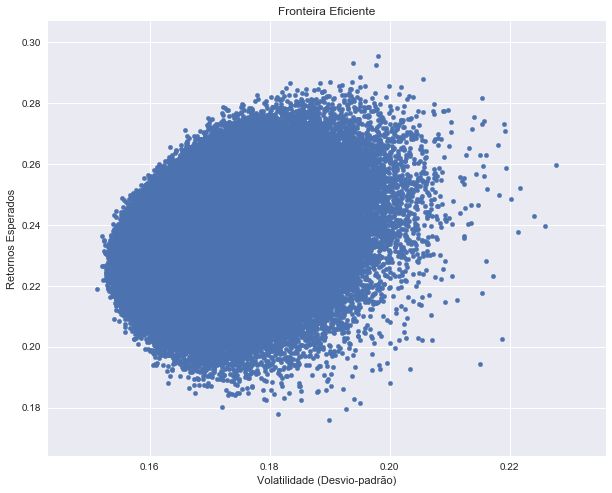

In [245]:
plt.style.use('seaborn')

df.plot.scatter(x='Volatilidade', y='Retornos', figsize=(10, 8), grid=True)

plt.xlabel('Volatilidade (Desvio-padrão)')

plt.ylabel('Retornos Esperados')

plt.title('Fronteira Eficiente')

plt.show()